### تحليل بيانات المرضى الجدد المسجلين في مستشفى الملك فيصل التخصصي بالرياض و جدة و المدينة من الربع الاول لعام 2025

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [45]:
df_jeddah = pd.read_csv('Values of newly registered patients in Jeddah CSV.csv')
df_madinah = pd.read_csv('Values of newly registered patient in Madinah CSV.csv')
df_riyadh = pd.read_csv('Values of newly registered patients in Riyadh CSV.csv')

In [51]:
df_concat = pd.concat([df_jeddah,df_madinah,df_riyadh],axis=0)
df_concat

,DECEASED_DESC,SEX,NATIONALITY,MARITAL_TYPE,REGION,LOCATION,DEPARTMENT,YEAR
0,Active,Female,Saudi,Married,Western Region,JEDDAH,Obstetrics & Gynaecology,2025
1,Active,Female,Saudi,Married,Western Region,JEDDAH,Neurosciences,2025
2,Active,Male,Saudi,Single,Northern Region,JEDDAH,Heart Center,2025
3,Inactive,Male,Saudi,Single,Western Region,JEDDAH,Heart Center,2025
4,Inactive,Female,Saudi,Single,Southern Region,JEDDAH,Heart Center,2025
...,...,...,...,...,...,...,...,...
6457,Active,Male,Saudi,Single,Western Region,RIYADH,Medical Genetics,2025
6458,Active,Male,Saudi,Single,Central Region,RIYADH,Neurosciences,2025
6459,Active,Male,Saudi,Married,Western Region,RIYADH,Neurosciences,2025
6460,Active,Male,Saudi,Married,Central Region,RIYADH,Neurosciences,2025


In [47]:
df_concat.head()
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9506 entries, 0 to 6461
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DECEASED_DESC  9506 non-null   object
 1   SEX            9506 non-null   object
 2   NATIONALITY    9506 non-null   object
 3   MARITAL_TYPE   9506 non-null   object
 4   REGION         9506 non-null   object
 5   LOCATION       9506 non-null   object
 6   DEPARTMENT     9506 non-null   object
 7   YEAR           9506 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 668.4+ KB


In [48]:
df_concat['DECEASED_DESC'].value_counts(normalize=True)

DECEASED_DESC
Active      0.748159
Inactive    0.240164
Deceased    0.011677
Name: proportion, dtype: float64

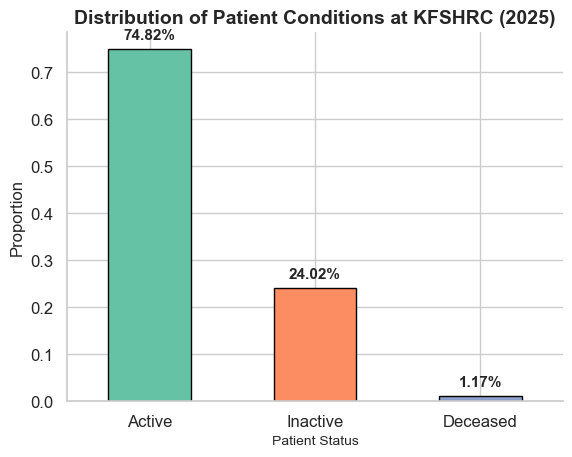

In [49]:
sns.set_theme(style="whitegrid")


ax = df_concat['DECEASED_DESC'].value_counts(normalize=True).plot(
    kind='bar', 
    color=sns.color_palette("Set2"),
    edgecolor='black'
)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Patient Conditions at KFSHRC (2025)', fontsize=14, fontweight='bold')
plt.xlabel('Patient Status', fontsize=10)
plt.ylabel('Proportion', fontsize=12)

sns.despine()


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=11, fontweight='bold',
        xytext=(0, 10),
        textcoords='offset points'
    )
plt.savefig('distribution of patient at KFSHRC.svg',dpi=300)
plt.show()


##  Distribution of Patient Conditions

This section analyzes the distribution of patient status within the dataset. 
We focused on the `DECEASED_DESC` variable, which categorizes patients into:

- **Active**: Currently receiving services / alive.
- **Inactive**: No recent activity or disengaged.
- **Deceased**: Recorded as deceased.

###  Summary of Counts

From the data, we obtained the following counts:

| Status    | Count |
|-----------|-------|
| Active    | 2274  |
| Inactive  |  727  |
| Deceased  |   43  |

This indicates that roughly:

- ~74% of patients are **Active**.
- ~24% are **Inactive**.
- ~1% are **Deceased**.

###  Visualization

The bar chart below shows the **normalized proportions** of each patient condition:

- We used `value_counts(normalize=True)` to calculate proportions instead of absolute counts.
- This helps to better understand the relative composition.

###  Interpretation

- The vast majority of patients are currently **Active**, highlighting a strong ongoing engagement with healthcare services.
- A smaller proportion are **Inactive**, which may suggest a need to investigate disengagement reasons (missed appointments, improved conditions, or other factors).
- Only a very small fraction of the dataset is **Deceased**, which is expected in most general patient cohorts.

> **Note:** These insights are purely descriptive and do not imply causality. Further analysis could explore how these statuses vary across other factors like age groups, departments, or chronic conditions.

---



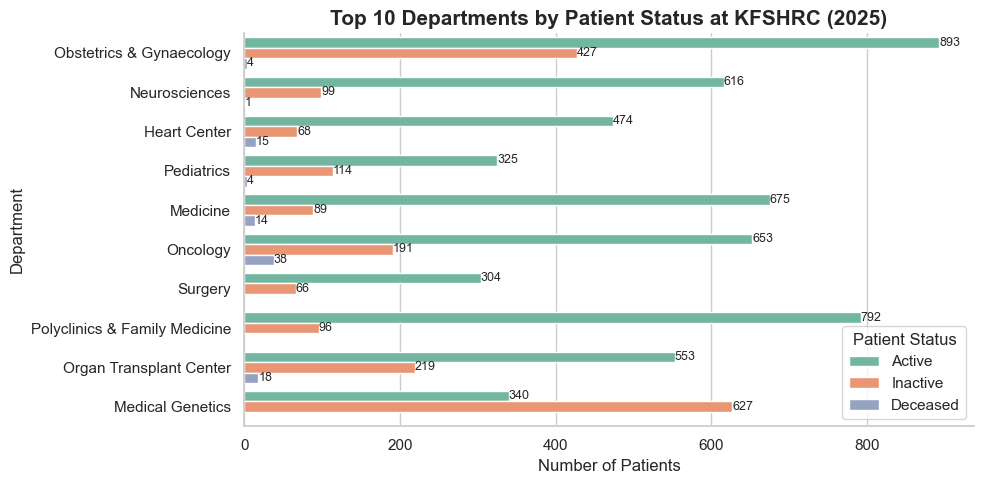

In [52]:
top_departments = (
    df_concat['DEPARTMENT']
    .value_counts()
    .head(10)
    .index
)

df_top10 = df_concat[df_concat['DEPARTMENT'].isin(top_departments)]


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df_top10,
    y='DEPARTMENT',
    hue='DECEASED_DESC',
    palette='Set2'
)

plt.title('Top 10 Departments by Patient Status at KFSHRC (2025)', fontsize=15, fontweight='bold')
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', fontsize=9)

sns.despine()
plt.legend(title='Patient Status')
plt.tight_layout()
plt.savefig('Top_10_Departments_by_Patient_Status_at_KFSHRC.svg', dpi=300)
plt.show()


## Patient Status Distribution Across Departments

This section explores how patient conditions (Active, Inactive, Deceased) are distributed across different hospital departments.

---

###  Methodology

- We used `sns.countplot` with:
  - `y='DEPARTMENT'` to list departments on the vertical axis.
  - `hue='DECEASED_DESC'` to differentiate the patient status by color (Active, Inactive, Deceased).

This approach allows easy comparison of counts within each department across the three patient statuses.

---

###  Key Observations

- **Obstetrics & Gynaecology, Polyclinics & Family Medicine, Heart Center and Surgery** departments have the highest total patient volumes.
- The majority of patients in nearly all departments are **Active**, indicated by the dominant blue bars.
- Departments like **Oncology, Heart Center, and Medicine** show visibly higher counts of **Deceased** patients compared to others, though still relatively small overall.
- **Inactive** patients are present across most departments, often making up the second largest category.

---

###  Interpretation & Notes

- The relatively higher counts of deceased patients in **Oncology and Heart Center** is consistent with expectations given the critical nature of their cases.
- Understanding these distributions can help target follow-up strategies and resource planning for high-risk departments.
- For deeper insights, proportions (rather than absolute counts) could be plotted to normalize for department size.




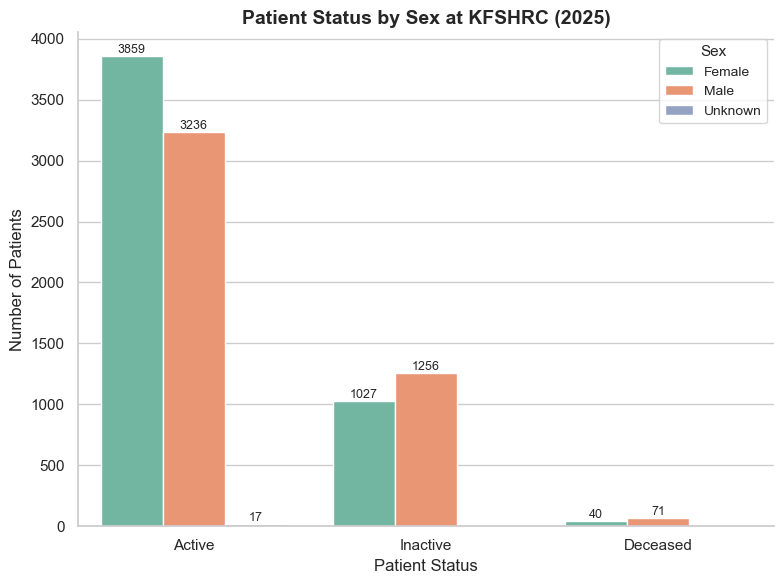

In [53]:
sns.set_theme(style="whitegrid")


plt.figure(figsize=(8,6))


ax = sns.countplot(
    data=df_concat, 
    x='DECEASED_DESC', 
    hue='SEX', 
    palette='Set2'
)

plt.title('Patient Status by Sex at KFSHRC (2025)', fontsize=14, fontweight='bold')
plt.xlabel('Patient Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

for c in ax.containers:
    ax.bar_label(c, fmt='%d', fontsize=9)


sns.despine()


plt.legend(title='Sex', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('Patient Status by Sex at KFSHRC.svg',dpi=300)
plt.show()


##  Patient Status by Gender

This visualization breaks down patient conditions (Active, Inactive, Deceased) by gender (Female, Male, Unknown).

---

### Observations

- **Active Patients:**
  - The largest group for both females and males.
  - Females have slightly higher counts than males.
  - Very few patients with `Unknown` gender.

- **Inactive Patients:**
  - Counts are somewhat balanced between females and males.
  - Again, `Unknown` category is minimal.

- **Deceased Patients:**
  - Notably, deceased counts are slightly higher among males than females.
  - `Unknown` gender shows negligible numbers.

---

###  Interpretation & Insights

- The higher deceased count among males might indicate:
  - Different health-seeking behavior.
  - Underlying co-morbidities more prevalent in males.
  - Or simply demographic differences in the hospital's catchment area.

- Very low `Unknown` gender entries suggest good data quality on this attribute.




In [54]:
pd.pivot_table(df_concat, index='DEPARTMENT', columns='DECEASED_DESC', aggfunc='size', fill_value=0)


DECEASED_DESC,Active,Deceased,Inactive
DEPARTMENT,,,
Adult Critical Care,26,6,4
Ambulatory Care Nursing,196,2,38
Anesthesiology,0,0,1
Dentistry,19,0,0
Dept Mental Health,1,0,0
Dermatology,30,0,2
Emergency Medical Service,15,0,0
Executive Health,1,0,0
Heart Center,474,15,68


In [55]:
marital_deceased = pd.crosstab(df_concat['MARITAL_TYPE'], df_concat['DECEASED_DESC'], normalize='index')

print(marital_deceased)


DECEASED_DESC    Active  Deceased  Inactive
MARITAL_TYPE                               
Divorced       0.731959  0.020619  0.247423
Married        0.688624  0.011181  0.300194
Single         0.798324  0.010522  0.191154
Unknown        0.378788  0.121212  0.500000
Widowed        0.886598  0.010309  0.103093


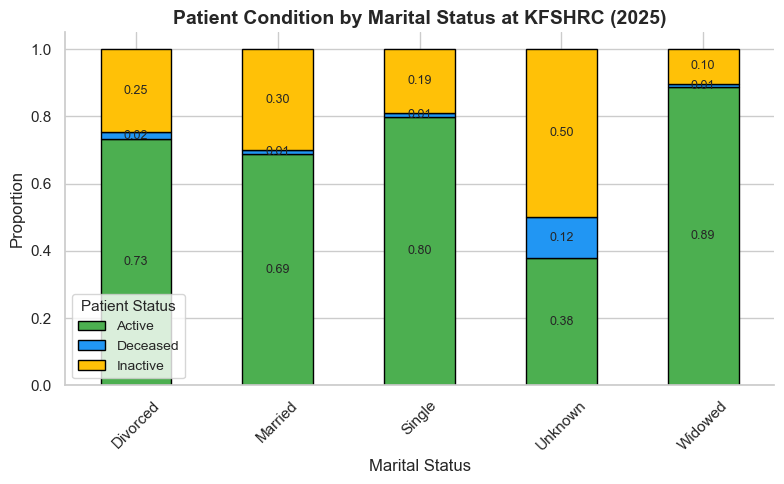

In [56]:
ax = marital_deceased.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8,5), 
    color=['#4CAF50', '#2196F3', '#FFC107'], 
    edgecolor='black'
)

plt.title('Patient Condition by Marital Status at KFSHRC (2025)', fontsize=14, fontweight='bold')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Patient Status', fontsize=10, title_fontsize=11)

for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', fontsize=9, label_type='center')

sns.despine()
plt.tight_layout()
plt.savefig('Patient Condition by Marital Status at KFSHRC.svg',dpi=300)
plt.show()



Patient Condition by Marital Status
This stacked bar chart visualizes the proportion of patients by condition status (Active, Inactive, Deceased) across different marital statuses.

Data Summary
Marital Type	Active	Deceased	Inactive
Divorced	~73%	~2%	~25%
Married	~69%	~1%	~30%
Single	~80%	~1%	~19%
Unknown	~38%	~12%	~50%
Widowed	~89%	~1%	~10%

Key Observations
Divorced patients have the highest proportion of deceased (≈2%) and a notable share of inactive (~25%).

Married patients show the highest inactive proportion (~30%) compared to other groups.

Single patients maintain a strong active rate (~80%) with minimal deceased.

Patients with Unknown marital status stand out with the largest inactive proportion (~50%) and a noticeably higher deceased share (~12%).

Widowed patients have the best active proportion (~89%) with virtually no deceased recorded.

Interpretation
This may indicate that divorced patients are somewhat more vulnerable, possibly due to reduced social support or underlying health disparities.

The elevated inactive proportion among married patients might be linked to an older demographic or more chronic long-term care needs.

The striking figures for the Unknown group could point to data quality gaps or hidden high-risk patients needing further study.

Widowed patients continuing to show high active rates and very low deceased levels might reflect targeted follow-up or demographic factors.